# 그래프 실습 문제집 (연습용)

이 노트북은 `graph_practice_dataset.csv` 데이터를 이용해 그래프 이론에서 다룬 시각화들을 모두 연습하도록 구성되었습니다.

포함 그래프 유형:
1. Line Plot (추세)
2. Bar Chart (범주 비교)
3. Grouped Bar (범주+세그먼트 비교)
4. Pie Chart (비율)
5. Histogram (분포)
6. Box Plot (이상치/중앙값)
7. Scatter Plot (상관관계)
8. Heatmap (행/열 매핑)
9. Twin Axis (서로 다른 단위)
10. Log Scale 시각화
11. 강조 색상 하이라이트
12. Annotation(주석)
13. 3C 원칙(명확성/일관성/맥락)

※ 먼저 아래 셀을 실행해 데이터프레임을 불러오세요.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/04_graph_practice_dataset.csv',encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


## 문제 1️⃣: 월별 전체 매출 추세 (Line Plot)

- `날짜`별 총 `매출`을 선 그래프로 나타내세요.
- `marker='o'`, `linewidth=2`, `grid=True`를 적용하세요.
- 그래프 제목: `월별 매출 추이`

In [2]:
df.columns

Index(['날짜', '지역', '제품', '매출', '이익', '고객수', '카테고리'], dtype='object')

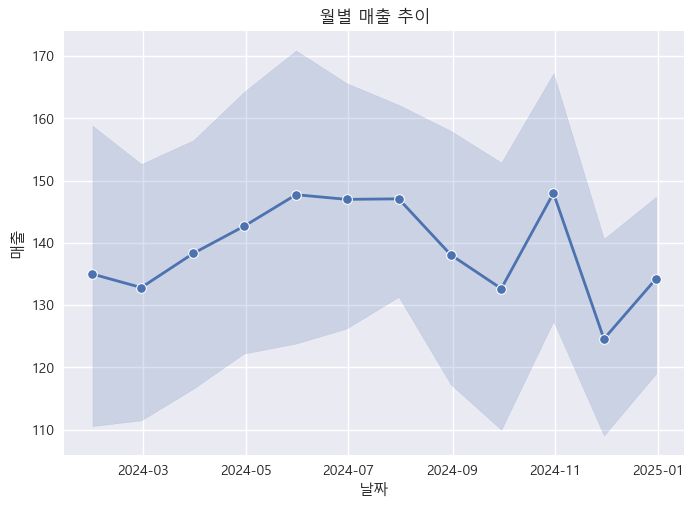

In [3]:
# TODO: 월별 매출 추세 그래프를 그리세요.
plt.figure()
sns.lineplot(data=df,x='날짜',y='매출',marker='o',linewidth=2)
plt.grid(True)
plt.title("월별 매출 추이")
plt.show()

## 문제 2️⃣: 지역별 매출 추세 비교

- 각 `지역`별로 월별 매출 합계를 구하고 한 그래프에 여러 선으로 그리세요.
- 범례(legend)를 추가하세요.
- 제목: `지역별 월별 매출 비교`

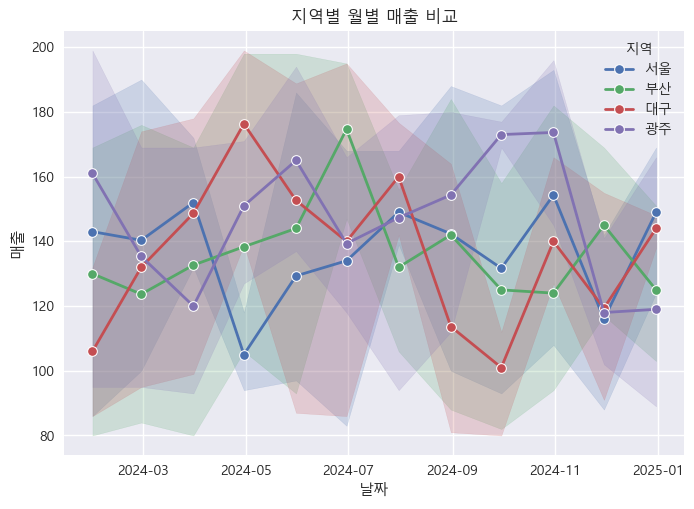

In [4]:
# TODO: 지역별 월별 매출을 선 그래프로 여러 개 겹쳐 그리세요.
plt.figure()
sns.lineplot(data=df, x='날짜', y='매출', hue='지역', marker='o',linewidth=2,legend=True)
plt.title("지역별 월별 매출 비교")
plt.show()

## 문제 3️⃣: 지역별 평균 매출 (Bar Chart)

- `지역`별 평균 `매출`을 막대 그래프로 나타내세요.
- x축: 지역 / y축: 평균 매출
- 제목: `지역별 평균 매출`

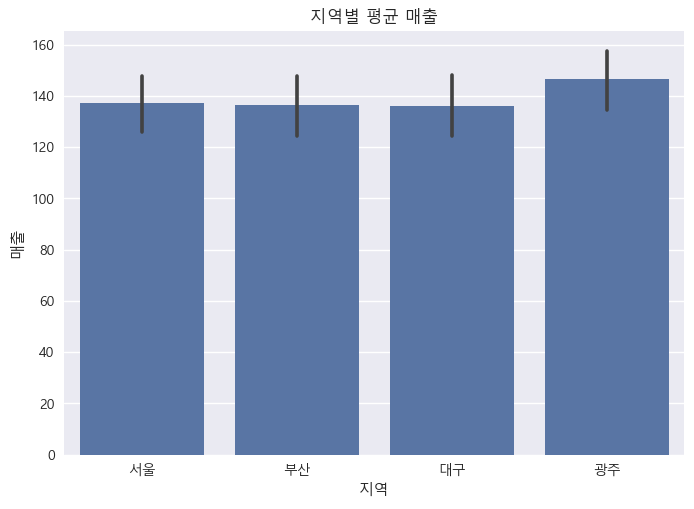

In [5]:
# TODO: 지역별 평균 매출 막대그래프를 그리세요.
plt.figure()
sns.barplot(data=df, x='지역', y='매출')
plt.title("지역별 평균 매출")
plt.show()

## 문제 4️⃣: 지역 vs 제품별 매출 (Grouped Bar)

- x축에 지역을 두고, 제품을 `hue`(또는 막대 그룹)로 나누어 비교하세요.
- 지역 안에서 제품 A, B, C의 평균 매출 차이를 확인합니다.
- 제목: `지역별 제품 평균 매출 비교`

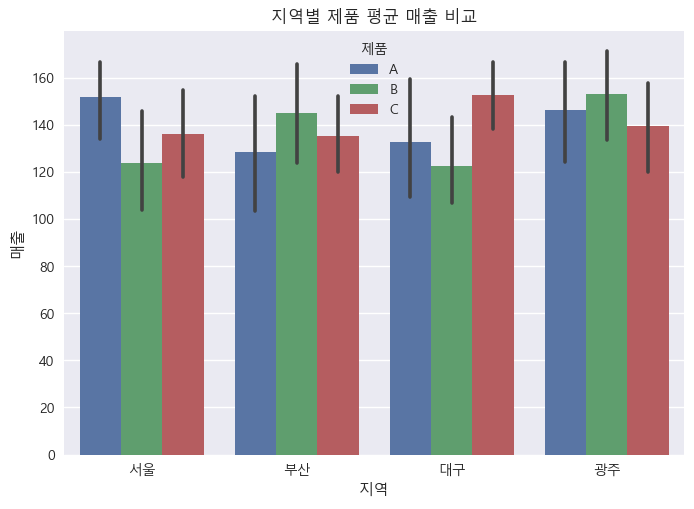

In [6]:
# TODO: 지역-제품별 평균 매출을 그룹 막대그래프로 시각화하세요.
plt.figure()
sns.barplot(data=df, x='지역', y='매출',hue='제품')
plt.title("지역별 제품 평균 매출 비교")
plt.show()

## 문제 5️⃣: 제품별 총매출 비중 (Pie Chart)

- 전체 기간 동안 제품 A, B, C가 차지하는 총 매출 비율을 원형 그래프로 나타내세요.
- `autopct='%.1f%%'` 옵션을 사용하세요.
- 제목: `제품별 매출 비중`

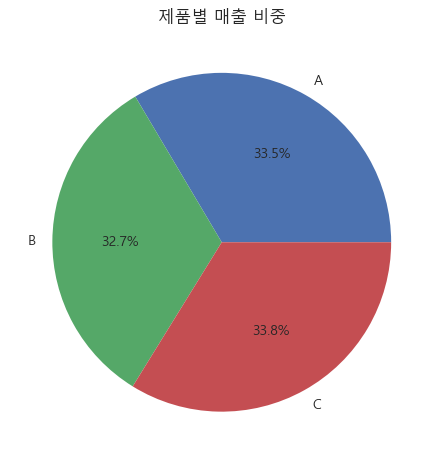

In [7]:
# TODO: 제품별 총매출 비중을 원형 차트로 표현하세요.
plt.figure()
plt.pie(df.groupby('제품')['매출'].sum(),autopct='%.1f%%',labels=df['제품'].unique())
plt.title("제품별 매출 비중")
plt.show()

## 문제 6️⃣: 이익 분포 (Histogram)

- 전체 행에 대해 `이익` 값의 분포를 히스토그램으로 그리세요.
- bin 개수는 15로 설정하세요.
- 제목: `이익 분포`

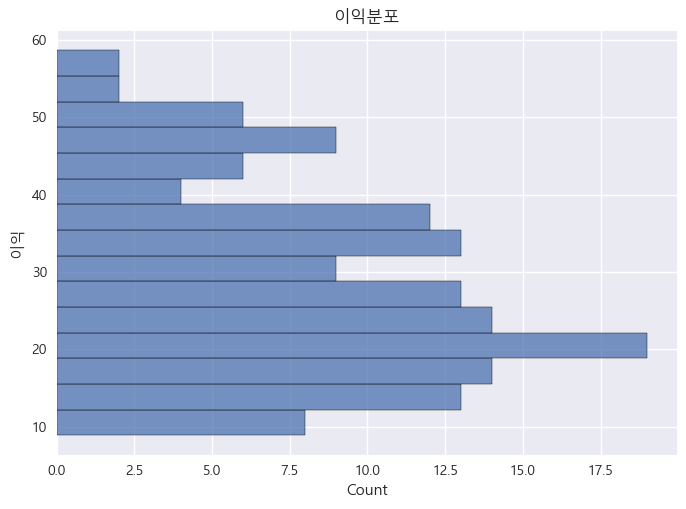

In [8]:
# TODO: 이익 분포를 히스토그램으로 시각화하세요.
plt.figure()
sns.histplot(data=df, y='이익',bins=15)
plt.title("이익분포")
plt.show()

## 문제 7️⃣: 제품별 이익 분포 (Box Plot)

- 제품별 `이익` 분포를 박스플롯으로 표현하세요.
- 중앙값, 이상치 등을 비교합니다.
- 제목: `제품별 이익 분포`

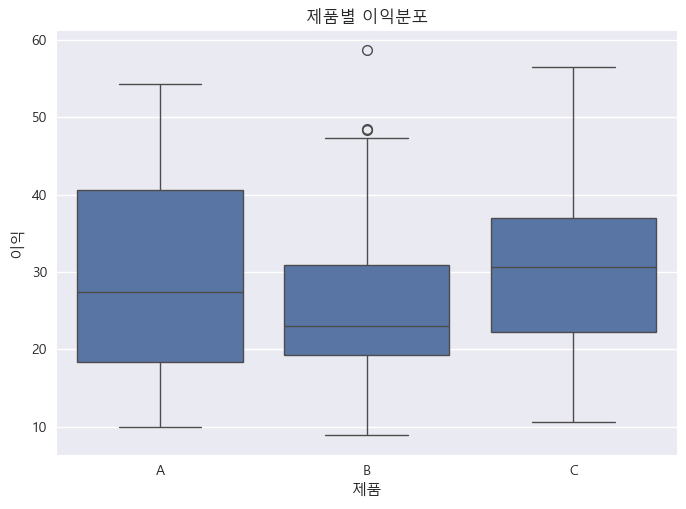

In [9]:
# TODO: 제품별 이익 분포를 박스플롯으로 시각화하세요.
plt.figure()
sns.boxplot(data=df,x='제품', y='이익')
plt.title("제품별 이익분포")
plt.show()

## 문제 8️⃣: 매출 vs 이익 (Scatter Plot)

- x축: `매출`, y축: `이익` 산점도를 그리세요.
- 점 색깔은 `지역`에 따라 다르게 하세요.
- 제목: `매출과 이익의 관계`

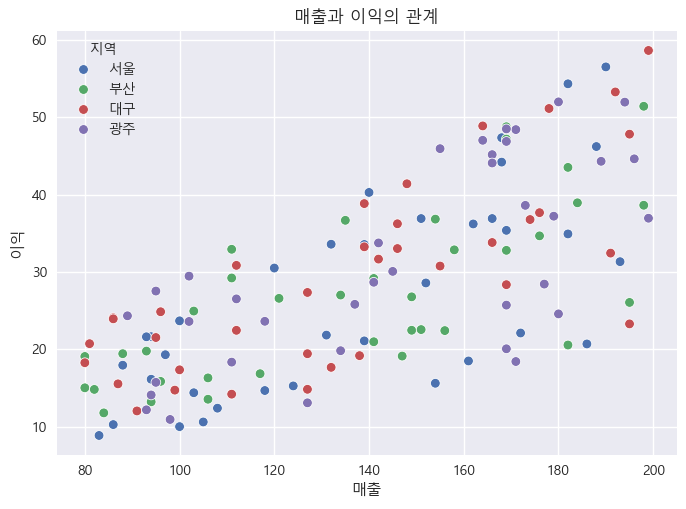

In [10]:
# TODO: 매출-이익 산점도를 그리고 지역별로 색을 구분하세요.
plt.figure()
sns.scatterplot(data=df,x='매출', y='이익',hue='지역')
plt.title("매출과 이익의 관계")
plt.show()

## 문제 9️⃣: 지역 × 제품 매출 Heatmap

- `지역`(행)과 `제품`(열)을 기준으로 평균 `매출` pivot_table을 만드세요.
- 그 결과를 heatmap으로 시각화하세요.
- 제목: `지역-제품 평균 매출 히트맵`

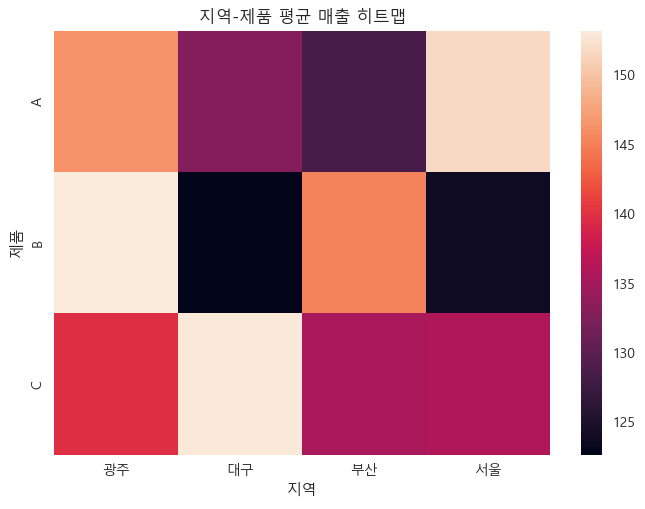

In [11]:
# TODO: 지역×제품 평균 매출을 피벗테이블로 만들고 heatmap으로 시각화하세요.
pivot_table = df.pivot_table(
    index='제품',       
    columns='지역',     
    values='매출',      
    aggfunc='mean'      
)

plt.figure()
sns.heatmap(pivot_table)
plt.title("지역-제품 평균 매출 히트맵")
plt.show()

## 문제 🔟: 매출 vs 고객수 (Twin Axis)

- x축은 `날짜`.
- 왼쪽 y축: 월별 총 매출 (막대그래프)
- 오른쪽 y축: 월별 총 고객수 (선 그래프)
- 제목: `월별 매출과 고객 수 추이`
- 힌트: `ax1.twinx()`

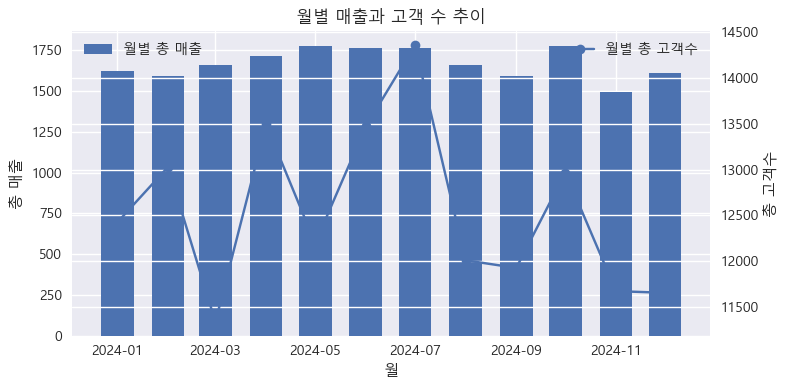

In [51]:
df['날짜'] = pd.to_datetime(df['날짜'])

monthly = df.groupby(df['날짜'].dt.to_period('M')).agg({
    '매출': 'sum',
    '고객수': 'sum'
}).reset_index()
monthly['날짜'] = monthly['날짜'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.bar(monthly['날짜'], monthly['매출'], label='월별 총 매출', width=20)
ax1.set_xlabel('월')
ax1.set_ylabel('총 매출')

ax2 = ax1.twinx()
ax2.plot(monthly['날짜'], monthly['고객수'], marker='o', label='월별 총 고객수')
ax2.set_ylabel('총 고객수')
ax2.tick_params(axis='y')

plt.title('월별 매출과 고객 수 추이')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## 문제 1️⃣1️⃣: 로그 스케일 시각화

- 어떤 제품-지역 조합의 `고객수`는 다른 조합보다 훨씬 클 수 있습니다.
- `고객수` 평균을 제품별로 집계한 후 막대그래프를 그리고,
  같은 데이터를 y축을 로그 스케일(`plt.yscale('log')`)로도 시각화하세요.
- 제목: `제품별 평균 고객 수 (일반 축)` / `제품별 평균 고객 수 (로그 축)`

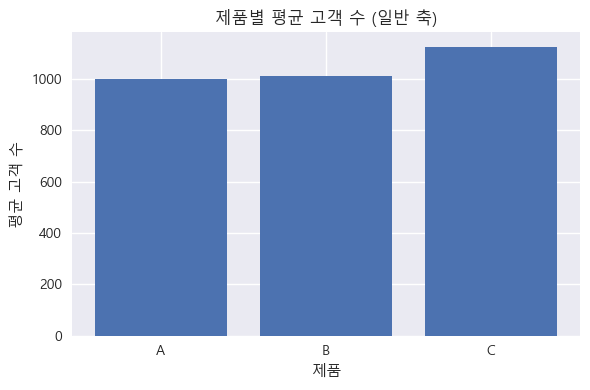

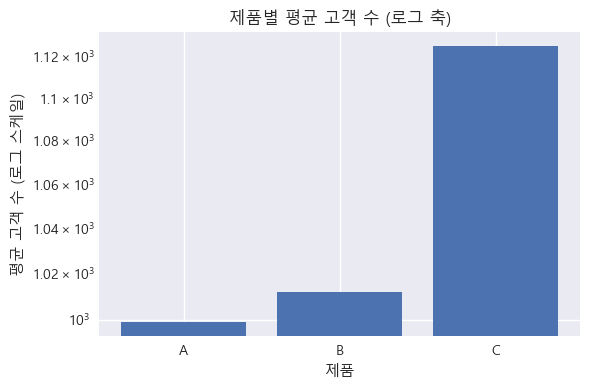

In [50]:
# TODO: 제품별 평균 고객수를 막대그래프로 그리고, 두 번째 그래프는 y축 로그 스케일로 표현하세요.
mean_customers = df.groupby('제품')['고객수'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(mean_customers['제품'], mean_customers['고객수'])
plt.title('제품별 평균 고객 수 (일반 축)')
plt.xlabel('제품')
plt.ylabel('평균 고객 수')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(mean_customers['제품'], mean_customers['고객수'])
plt.yscale('log') 
plt.title('제품별 평균 고객 수 (로그 축)')
plt.xlabel('제품')
plt.ylabel('평균 고객 수 (로그 스케일)')
plt.tight_layout()
plt.show()

## 문제 1️⃣2️⃣: 이상치 강조 (색상 강조)

- 월별 총 매출을 막대그래프로 그리되,
  평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 칠하세요.
- 제목: `월별 매출 (평균 대비 강조)`

C:\Users\Admin\AppData\Local\Temp\ipykernel_14524\2504860412.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


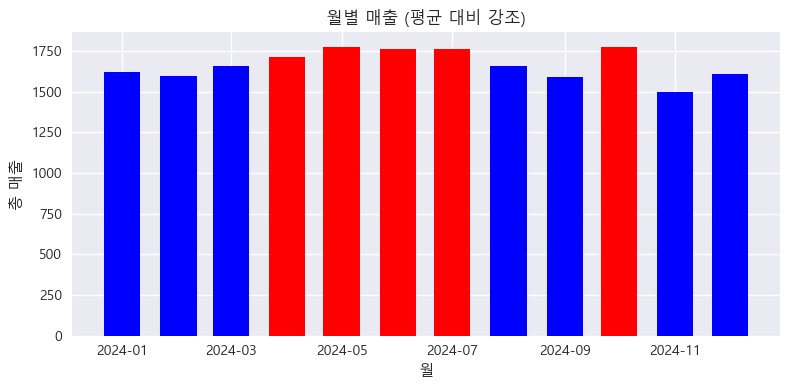

In [55]:
# TODO: 평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 색을 다르게 지정하세요.
df['날짜'] = pd.to_datetime(df['날짜'])
monthly_sales = df.groupby(df['날짜'].dt.to_period('M'))['매출'].sum().reset_index()
monthly_sales['날짜'] = monthly_sales['날짜'].dt.to_timestamp()

avg_sales = monthly_sales['매출'].mean()
colors = ['red' if v > avg_sales else 'blue' for v in monthly_sales['매출']]

plt.figure(figsize=(8, 4))
plt.bar(monthly_sales['날짜'], monthly_sales['매출'], color=colors,width=20)


plt.title('월별 매출 (평균 대비 강조)')
plt.xlabel('월')
plt.ylabel('총 매출')
plt.legend()

plt.tight_layout()
plt.show()


## 문제 1️⃣3️⃣: 주석(Annotation)으로 포인트 강조

- 월별 총 고객수를 선 그래프로 나타내세요.
- 가장 큰 값을 찍은 달에 화살표와 텍스트로 `고객 급증`이라고 표시하세요.
- 제목: `월별 고객 수 추이`

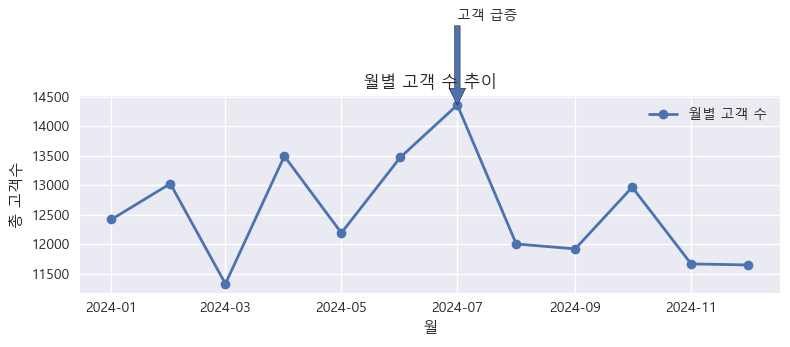

In [61]:
# TODO: 월별 고객 수를 선 그래프로 그린 후 최고점에 주석/화살표를 추가하세요.
df['날짜'] = pd.to_datetime(df['날짜'])

monthly_customers = df.groupby(df['날짜'].dt.to_period('M'))['고객수'].sum().reset_index()
monthly_customers['날짜'] = monthly_customers['날짜'].dt.to_timestamp()
max_row = monthly_customers.loc[monthly_customers['고객수'].idxmax()]

plt.figure(figsize=(8, 4))
plt.plot(monthly_customers['날짜'], monthly_customers['고객수'],
         marker='o', linewidth=2, label='월별 고객 수')
plt.annotate('고객 급증',
             xy=(max_row['날짜'], max_row['고객수']),     
             xytext=(max_row['날짜'], max_row['고객수'] * 1.1), 
             arrowprops=dict( )
            )
plt.title('월별 고객 수 추이')
plt.xlabel('월')
plt.ylabel('총 고객수')
plt.legend()

plt.tight_layout()
plt.show()


## 문제 1️⃣4️⃣: 3C 원칙 (Clarity / Consistency / Context)

- `카테고리`별 총 매출을 막대그래프로 나타내세요.
- 그래프에 아래 사항을 모두 반영하세요:
  - 제목에 기간(2024년)과 단위(매출 합계)를 명시할 것
  - x축/y축 라벨 추가
  - grid는 약하게 표시 (`alpha=0.3`)
  - legend는 숨기거나 frameon=False 로 처리해 시각적 노이즈 최소화
- 제목 예시: `2024년 카테고리별 매출 합계 (단위: 임의 금액)`

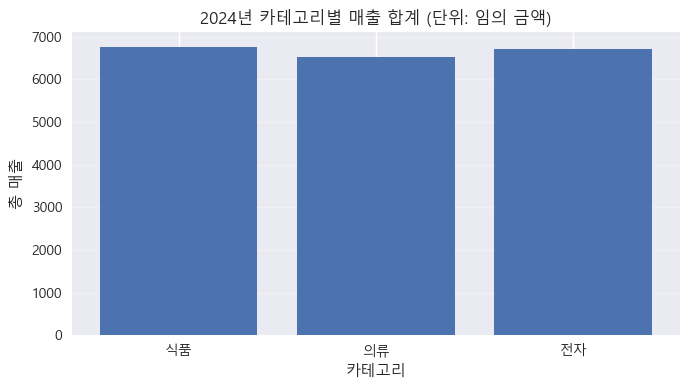

In [63]:
# TODO: 3C 원칙(명확성/일관성/맥락)을 지키는 카테고리별 매출 그래프를 작성하세요.
df['날짜'] = pd.to_datetime(df['날짜'])
df_2024 = df[df['날짜'].dt.year == 2024]
category_sales = df_2024.groupby('카테고리')['매출'].sum().reset_index()

plt.figure(figsize=(7, 4))
bars = plt.bar(category_sales['카테고리'], category_sales['매출'])
plt.title('2024년 카테고리별 매출 합계 (단위: 임의 금액)')
plt.xlabel('카테고리')
plt.ylabel('총 매출')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


---
### ✅ 끝!
이 문제들로 라인, 막대, 그룹막대, 파이, 히스토그램, 박스, 산점도, 히트맵, twinx, 로그스케일, 강조색, 주석, 3C 원칙까지 모두 연습할 수 있습니다.
수업에서는 보통:
1. 문제만 있는 버전으로 실습 →
2. 정답 포함 버전으로 복습/해설
순서로 진행하면 효과가 매우 좋습니다.
